In [71]:
import pandas as pd
import glob
import os

# Load pre-computed decile ACS data

In [68]:
MSA_decile_df = pd.read_csv(r'H:\covid_mobility_results\new_census_data\ACS_2019_5YR_BG\ACS_race_cbsa_income_2019_county_decile.csv')
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,...,State Name,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,mean_household_income_decile
0,178384.0,46,13,951300,4,45.471326,-98.485461,5.645881e+05,15000US460139513004,46013,...,South Dakota,46,13,15000US460139513004,27537204.0,609.0,45217.083744,39313,460139513004,1.0
1,178385.0,46,13,951400,2,45.477318,-98.474772,5.621843e+05,15000US460139514002,46013,...,South Dakota,46,13,15000US460139514002,23217346.0,336.0,69099.244048,70581,460139514002,4.0
2,178386.0,46,13,951400,3,45.469792,-98.476958,3.227120e+05,15000US460139514003,46013,...,South Dakota,46,13,15000US460139514003,17499844.0,339.0,51621.958702,46875,460139514003,2.0
3,178387.0,46,13,951400,4,45.469845,-98.464338,1.385900e+06,15000US460139514004,46013,...,South Dakota,46,13,15000US460139514004,34309788.5,496.0,69172.960685,59722,460139514004,4.0
4,178388.0,46,13,951400,5,45.462380,-98.467793,8.121156e+05,15000US460139514005,46013,...,South Dakota,46,13,15000US460139514005,25762257.5,497.0,51835.528169,43604,460139514005,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202620,194510.0,48,505,950400,4,26.844204,-99.242335,4.413523e+07,15000US485059504004,48505,...,Texas,48,505,15000US485059504004,35529660.0,699.0,50829.270386,43550,485059504004,4.0
202621,194511.0,48,505,950400,3,27.014826,-99.118435,1.578653e+09,15000US485059504003,48505,...,Texas,48,505,15000US485059504003,39367266.0,595.0,66163.472269,0,485059504003,7.0
202622,194512.0,48,505,950302,3,26.902485,-99.249957,1.016389e+07,15000US485059503023,48505,...,Texas,48,505,15000US485059503023,37977220.5,703.0,54021.650782,33914,485059503023,6.0
202623,194513.0,48,505,950301,1,26.919492,-99.260633,1.453950e+06,15000US485059503011,48505,...,Texas,48,505,15000US485059503011,35877132.5,911.0,39382.143249,29855,485059503011,2.0


In [109]:
MSA_decile_df.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'INTPTLAT',
       'INTPTLON', 'Shape_Area', 'GEOID_Data', 'county_code', 'COUNTY_NAME',
       'STATE_ABB', 'STATE_NAME', 'cbg_total_population', 'p_asian', 'p_black',
       'p_white', 'CBSA Code', 'CSA Code', 'CBSA Title',
       'Metropolitan/Micropolitan Statistical Area', 'CSA Title',
       'County/County Equivalent', 'State Name', 'FIPS State Code',
       'FIPS County Code', 'GEOID', 'total_household_income',
       'total_households', 'mean_household_income', 'median_household_income',
       'cbg_fips', 'mean_household_income_decile'],
      dtype='object')

## Load POI-time aggregated data

In [100]:
state_dir = r'J:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021\45'
county_POI_time_csvs = glob.glob(os.path.join(state_dir, '*', '*_top_category_dwell_time_2021*.csv'))
print(f'Found {len(county_POI_time_csvs)} files. Start to read them...')
county_POI_time_df
county_POI_time_df = pd.concat([pd.read_csv(f) for f in county_POI_time_csvs])

print(f"county_POI_time_df row counts: {len(county_POI_time_df)}")

Found 2392 files. Start to read them...
county_POI_time_df row counts: 6009645


In [102]:
county_POI_time_df.head(5)

,visitor_home_cbgs,top_category,top_catetory_time
0,450019501001,Automobile Dealers,1081.030664
1,450019501001,"Beer, Wine, and Liquor Stores",20.000000
2,450019501001,Book Stores and News Dealers,203.809524
3,450019501001,Building Material and Supplies Dealers,4881.693431
4,450019501001,Child Day Care Services,47.384615


In [103]:
county_POI_time_df_annual = county_POI_time_df.groupby(['visitor_home_cbgs', 'top_category'], as_index=False).agg(top_catetory_time_annual = ('top_catetory_time', 'sum'))
county_POI_time_df_annual

,visitor_home_cbgs,top_category,top_catetory_time_annual
0,450019501001,"Accounting, Tax Preparation, Bookkeeping, and ...",8286.259696
1,450019501001,Activities Related to Credit Intermediation,1293.782609
2,450019501001,Administration of Economic Programs,493.154062
3,450019501001,"Agencies, Brokerages, and Other Insurance Rela...",1609.277716
4,450019501001,Amusement Parks and Arcades,12648.773417
...,...,...,...
310038,450910619003,Used Merchandise Stores,37823.314082
310039,450910619003,Utility System Construction,890.400000
310040,450910619003,Warehousing and Storage,4992.124701
310041,450910619003,Waste Treatment and Disposal,3498.268155


In [104]:
county_POI_time_df_annual['visitor_home_cbgs'] = county_POI_time_df_annual['visitor_home_cbgs'].astype(str).str.zfill(12)

In [133]:
county_POI_time_ACS_annual_df = county_POI_time_df_annual.merge(MSA_decile_df[['cbg_fips', 'mean_household_income_decile', 'CBSA Title', 'cbg_total_population']], left_on='visitor_home_cbgs', right_on='cbg_fips')
county_POI_time_ACS_annual_df['time_per_capita'] = county_POI_time_ACS_annual_df['top_catetory_time_annual'] / county_POI_time_ACS_annual_df['cbg_total_population']

In [136]:
county_POI_time_ACS_MSA_annual_df = county_POI_time_ACS_annual_df.groupby(['mean_household_income_decile', 'top_category', 'CBSA Title'], as_index=False).agg(time_per_capita = ('time_per_capita', 'mean'))
county_POI_time_ACS_MSA_annual_df

,mean_household_income_decile,top_category,CBSA Title,time_per_capita
0,0.0,"Accounting, Tax Preparation, Bookkeeping, and ...","Augusta-Richmond County, GA-SC",2.925160
1,0.0,"Accounting, Tax Preparation, Bookkeeping, and ...","Bennettsville, SC",2.003424
2,0.0,"Accounting, Tax Preparation, Bookkeeping, and ...","Charleston-North Charleston, SC",2.150924
3,0.0,"Accounting, Tax Preparation, Bookkeeping, and ...","Charlotte-Concord-Gastonia, NC-SC",1.234891
4,0.0,"Accounting, Tax Preparation, Bookkeeping, and ...","Columbia, SC",5.820643
...,...,...,...,...
24154,9.0,Wired and Wireless Telecommunications Carriers,"Orangeburg, SC",1.245814
24155,9.0,Wired and Wireless Telecommunications Carriers,"Seneca, SC",2.770867
24156,9.0,Wired and Wireless Telecommunications Carriers,"Spartanburg, SC",2.344904
24157,9.0,Wired and Wireless Telecommunications Carriers,"Sumter, SC",8.027608


(0.0, 380.0)

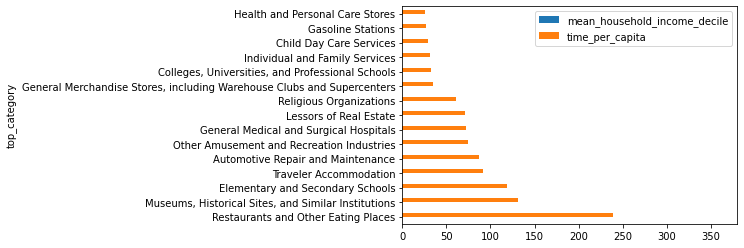

In [141]:
decile_0_df = county_POI_time_ACS_MSA_annual_df[county_POI_time_ACS_MSA_annual_df['CBSA Title'] == 'Columbia, SC']
decile_0_df = decile_0_df[decile_0_df['mean_household_income_decile'] == 0.0].nlargest(15, 'time_per_capita').set_index('top_category')

ax = decile_0_df.plot.barh()
ax.set_xlim(0, 380)

<AxesSubplot:ylabel='top_category'>

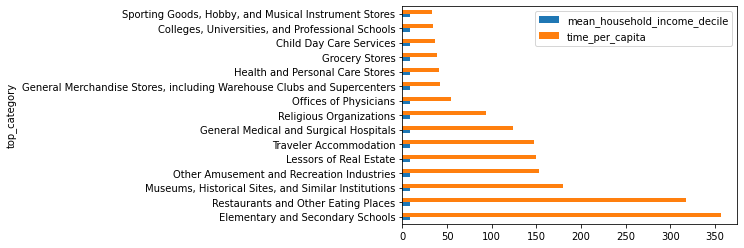

In [138]:
decile_9_df = county_POI_time_ACS_MSA_annual_df[county_POI_time_ACS_MSA_annual_df['CBSA Title'] == 'Columbia, SC']
decile_9_df = decile_9_df[decile_9_df['mean_household_income_decile'] == 9.0].nlargest(15, 'time_per_capita').set_index('top_category')
decile_9_df.plot.barh()

# Tools

## Compute decile

### Load ACS data

In [17]:
for root, dirs, files in os.walk(r'J:\Safegraph\weekly_county_files\weekly_patterns_2018_2021'):
    # print(dirs)
    break
dirs.remove('45')
dirs.remove('POI')
# dirs

In [3]:
ACS2019_df = pd.read_csv(r'H:\covid_mobility_results\new_census_data\ACS_2019_5YR_BG\ACS_race_cbsa_income_2019.zip')
ACS2019_df['cbg_fips'] = ACS2019_df['GEOID_Data'].str[-12:]

In [5]:
ACS2019_df.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'INTPTLAT',
       'INTPTLON', 'Shape_Area', 'GEOID_Data', 'county_code', 'COUNTY_NAME',
       'STATE_ABB', 'STATE_NAME', 'cbg_total_population', 'p_asian', 'p_black',
       'p_white', 'CBSA Code', 'CSA Code', 'CBSA Title',
       'Metropolitan/Micropolitan Statistical Area', 'CSA Title',
       'County/County Equivalent', 'State Name', 'FIPS State Code',
       'FIPS County Code', 'GEOID', 'total_household_income',
       'total_households', 'mean_household_income', 'median_household_income',
       'cbg_fips'],
      dtype='object')

In [57]:
MSA_dfs = []
for idx, (MSA_name, MSA_df) in enumerate(ACS2019_df.groupby('CBSA Title')):
    
    if idx % 100 == 0:
        print(idx, MSA_name)
    
    # assign the top decile. 
    sort_column = 'mean_household_income'
    MSA_df[f'{sort_column}_decile'] = pd.qcut(MSA_df[sort_column], 10, labels=False)
    # MSA_df['Decile_rank'] = MSA_df['Decile_rank'].astype(int)
    # MSA_df['Decile_rank_median'] = pd.qcut(MSA_df['median_household_income'], 10, labels=False)
    
    # print(len(MSA_df))
    
    MSA_dfs.append(MSA_df)
    
    # if idx == 0:
    #     break
        
MSA_decile_df = pd.concat(MSA_dfs)
MSA_decile_df
# MSA_df[[sort_column, 'Decile_rank', 'median_household_income', 'Decile_rank_median']].sort_values(sort_column)
# MSA_df[[sort_column, 'Decile_rank']].sort_values(sort_column)

0 Aberdeen, SD
100 Bogalusa, LA
200 Corsicana, TX
300 Fort Dodge, IA
400 Indianapolis-Carmel-Anderson, IN
500 Louisville/Jefferson County, KY-IN
600 New Castle, PA
700 Punta Gorda, FL
800 Spartanburg, SC
900 Watertown-Fort Atkinson, WI


,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,...,State Name,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,mean_household_income_decile
177464,178384.0,46,13,951300,4,45.471326,-98.485461,5.645881e+05,15000US460139513004,46013,...,South Dakota,46,13,15000US460139513004,27537204.0,609.0,45217.083744,39313,460139513004,1.0
177465,178385.0,46,13,951400,2,45.477318,-98.474772,5.621843e+05,15000US460139514002,46013,...,South Dakota,46,13,15000US460139514002,23217346.0,336.0,69099.244048,70581,460139514002,4.0
177466,178386.0,46,13,951400,3,45.469792,-98.476958,3.227120e+05,15000US460139514003,46013,...,South Dakota,46,13,15000US460139514003,17499844.0,339.0,51621.958702,46875,460139514003,2.0
177467,178387.0,46,13,951400,4,45.469845,-98.464338,1.385900e+06,15000US460139514004,46013,...,South Dakota,46,13,15000US460139514004,34309788.5,496.0,69172.960685,59722,460139514004,4.0
177468,178388.0,46,13,951400,5,45.462380,-98.467793,8.121156e+05,15000US460139514005,46013,...,South Dakota,46,13,15000US460139514005,25762257.5,497.0,51835.528169,43604,460139514005,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193544,194510.0,48,505,950400,4,26.844204,-99.242335,4.413523e+07,15000US485059504004,48505,...,Texas,48,505,15000US485059504004,35529660.0,699.0,50829.270386,43550,485059504004,4.0
193545,194511.0,48,505,950400,3,27.014826,-99.118435,1.578653e+09,15000US485059504003,48505,...,Texas,48,505,15000US485059504003,39367266.0,595.0,66163.472269,0,485059504003,7.0
193546,194512.0,48,505,950302,3,26.902485,-99.249957,1.016389e+07,15000US485059503023,48505,...,Texas,48,505,15000US485059503023,37977220.5,703.0,54021.650782,33914,485059503023,6.0
193547,194513.0,48,505,950301,1,26.919492,-99.260633,1.453950e+06,15000US485059503011,48505,...,Texas,48,505,15000US485059503011,35877132.5,911.0,39382.143249,29855,485059503011,2.0


In [64]:
MSA_decile_df[f'{sort_column}_decile'].isna().sum()

441

In [63]:
MSA_decile_df.to_csv(r'H:\covid_mobility_results\new_census_data\ACS_2019_5YR_BG\ACS_race_cbsa_income_2019_county_decile.csv', index=False)